# HOUSING: PRICE PREDICTION

# Business Goal:
Required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# Required librarys:-

In [2]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()#converting

# Loading the dataset

In [3]:
test=pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [4]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train=pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test.shape

(292, 80)

In [8]:
train.shape

(1168, 81)

In [9]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [10]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [13]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [14]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

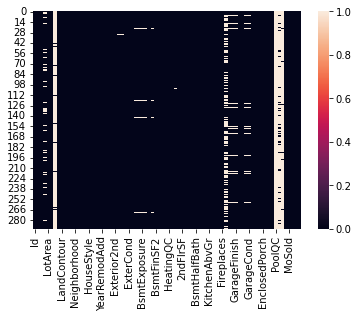

In [21]:
sns.heatmap(test.isnull())

<AxesSubplot:>

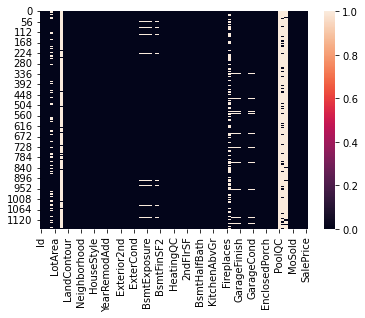

In [16]:
sns.heatmap(train.isnull())

# Cleaning the dataset

-Removing major errors, duplicates, and outliers
-Removing unwanted data points
-Bringing structure to your data
-Filling in major gaps

In [17]:
imp=SimpleImputer(strategy="most_frequent")

train['Fence']=imp.fit_transform(train['Fence'].values.reshape(-1,1))

train['FireplaceQu']=imp.fit_transform(train['FireplaceQu'].values.reshape(-1,1))

train['GarageFinish']=imp.fit_transform(train['GarageFinish'].values.reshape(-1,1))

train['GarageQual']=imp.fit_transform(train['GarageQual'].values.reshape(-1,1))

train['GarageCond']=imp.fit_transform(train['GarageCond'].values.reshape(-1,1))

In [18]:
train.drop(['PoolQC'],axis=1,inplace=True)

train.drop(['MiscFeature'],axis=1,inplace=True)

train.drop(['Id'],axis=1,inplace=True)

train.drop(['Alley'],axis=1,inplace=True)

train.drop(['Utilities'],axis=1,inplace=True)

In [19]:
list1=['LotShape','MSZoning','Street','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']
for val in list1:
    train[val]=le.fit_transform(train[val].astype(str))

In [20]:
list2=['BsmtFinType2','Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu','GarageType']
for val in list2:
    train[val]=le.fit_transform(train[val].astype(str))

In [24]:
list3=['GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','SaleType','SaleCondition','LotFrontage','MasVnrArea','GarageYrBlt']
for val in list3:
    train[val]=le.fit_transform(train[val].astype(str))

In [22]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')


train['LotFrontage']=imp.fit_transform(train['LotFrontage'].values.reshape(-1,1))
train['GarageYrBlt']=imp.fit_transform(train['GarageYrBlt'].values.reshape(-1,1))

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1168 non-null   int64
 1   MSZoning       1168 non-null   int32
 2   LotFrontage    1168 non-null   int32
 3   LotArea        1168 non-null   int64
 4   Street         1168 non-null   int32
 5   LotShape       1168 non-null   int32
 6   LandContour    1168 non-null   int32
 7   LotConfig      1168 non-null   int32
 8   LandSlope      1168 non-null   int32
 9   Neighborhood   1168 non-null   int32
 10  Condition1     1168 non-null   int32
 11  Condition2     1168 non-null   int32
 12  BldgType       1168 non-null   int32
 13  HouseStyle     1168 non-null   int32
 14  OverallQual    1168 non-null   int64
 15  OverallCond    1168 non-null   int64
 16  YearBuilt      1168 non-null   int64
 17  YearRemodAdd   1168 non-null   int64
 18  RoofStyle      1168 non-null   int32
 19  RoofMa

<AxesSubplot:>

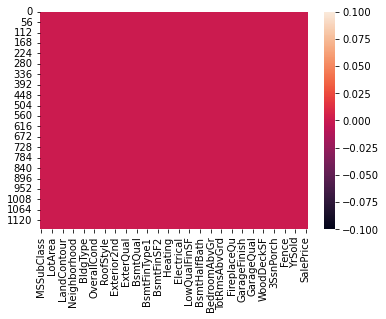

In [26]:
sns.heatmap(train.isnull())

We can check the Skewness: 
skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

In [27]:
train.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage      -0.522515
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 76, dtype: float64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

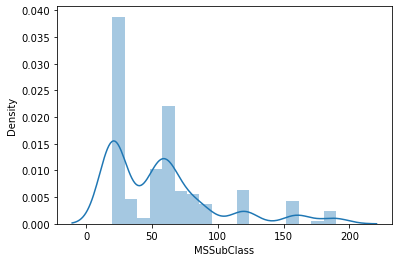

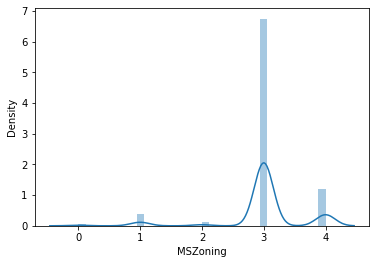

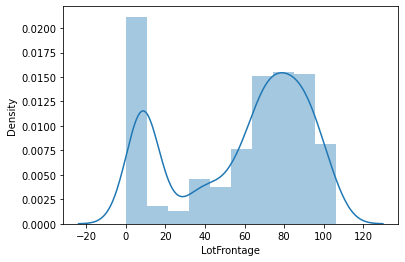

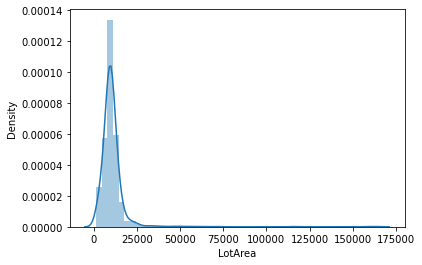

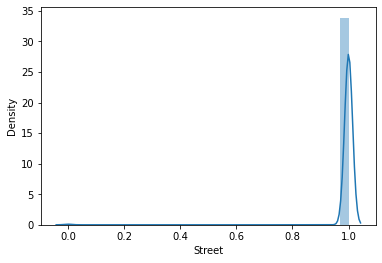

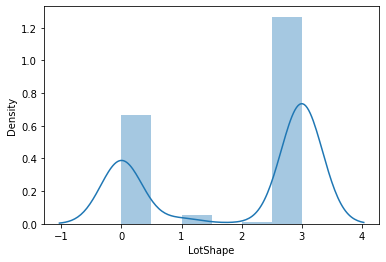

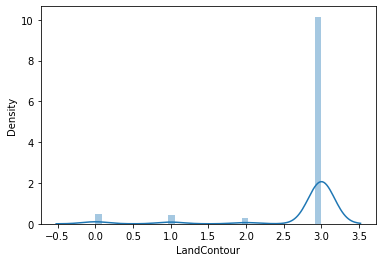

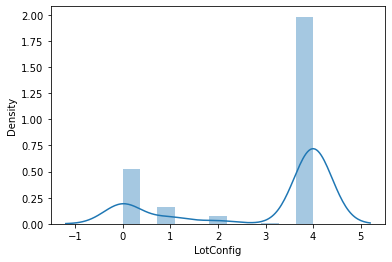

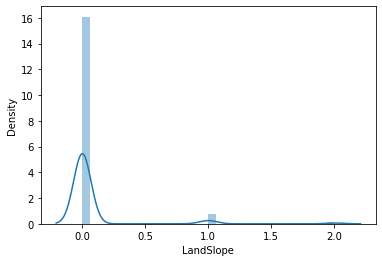

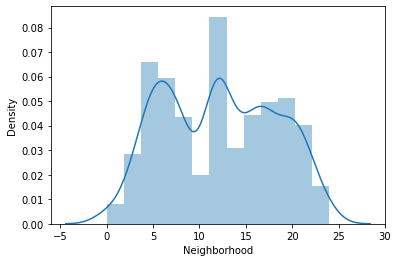

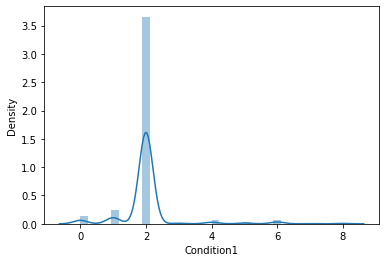

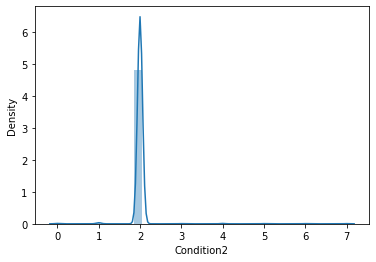

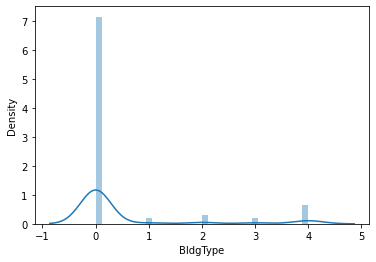

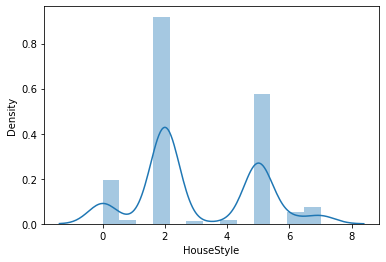

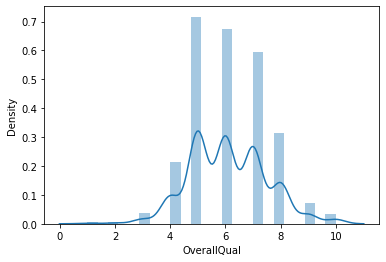

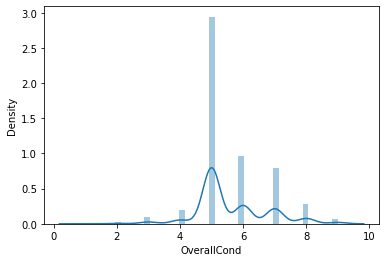

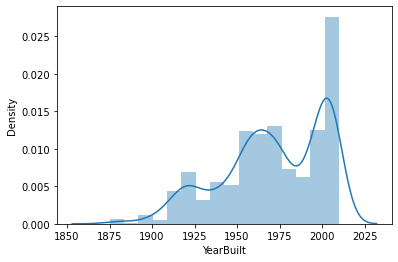

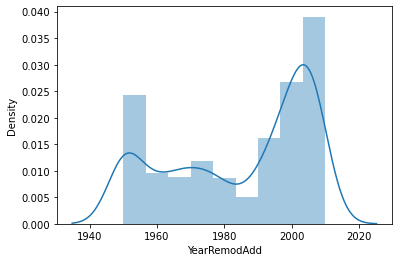

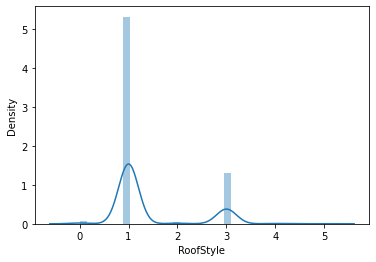

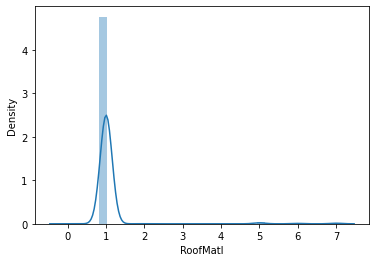

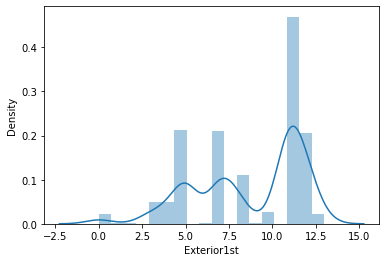

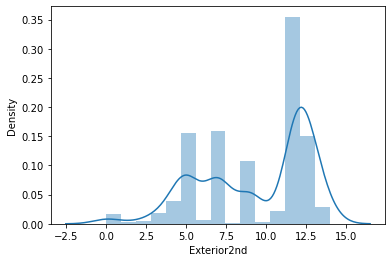

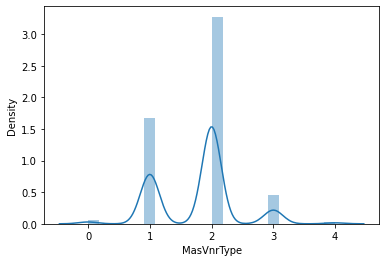

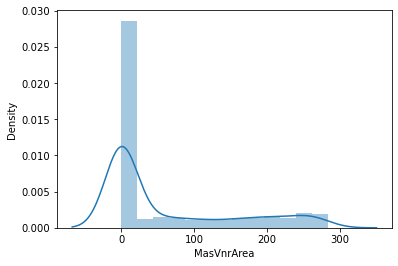

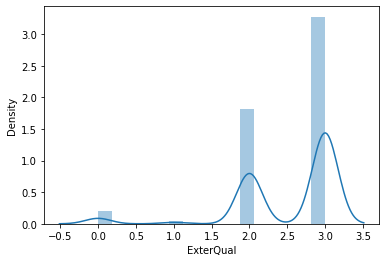

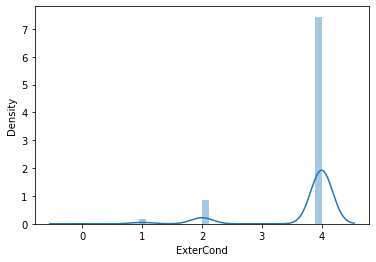

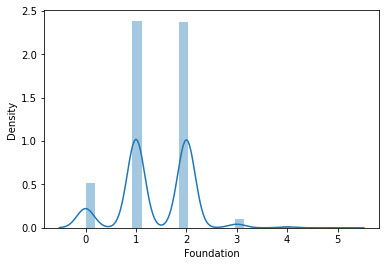

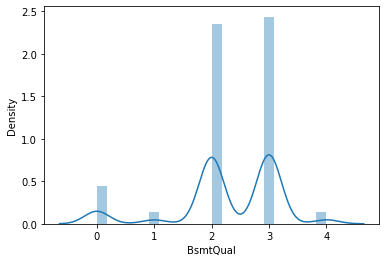

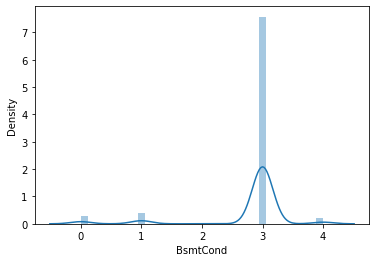

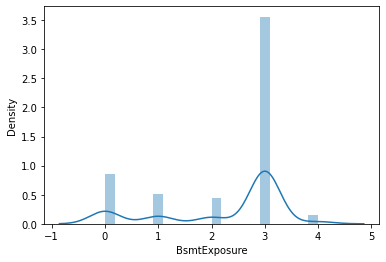

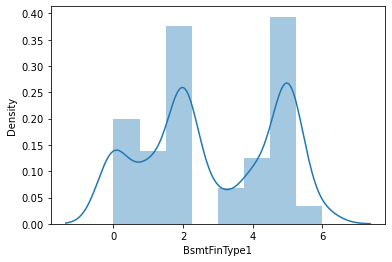

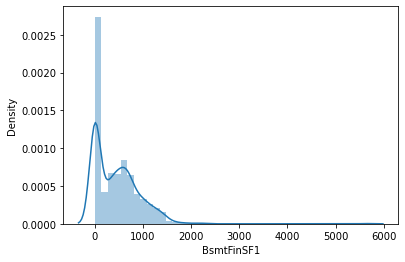

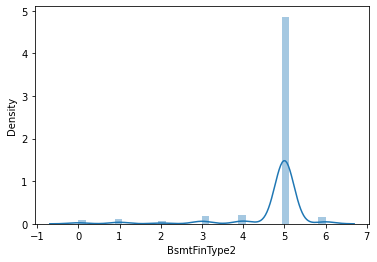

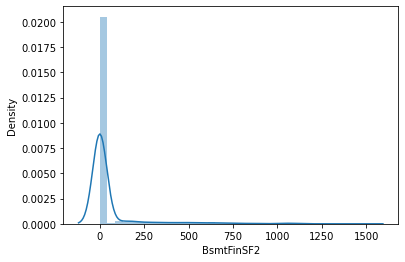

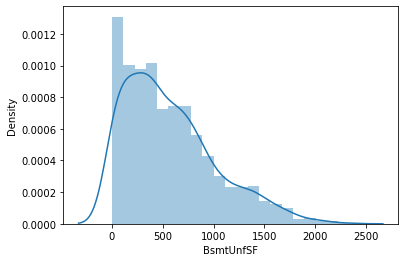

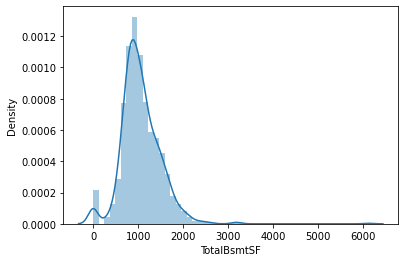

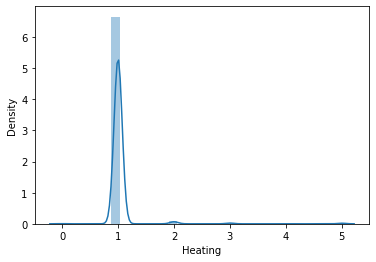

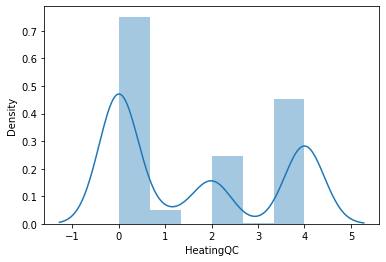

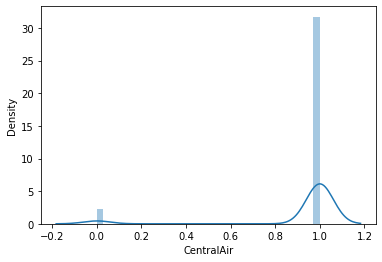

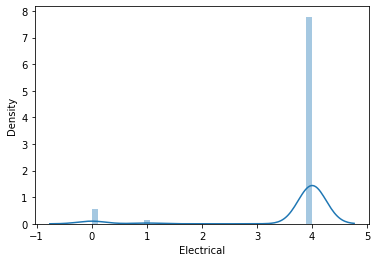

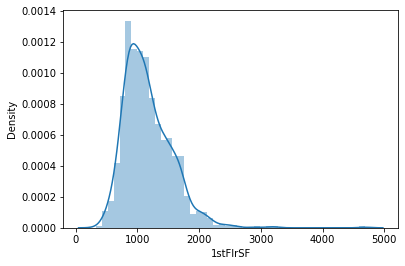

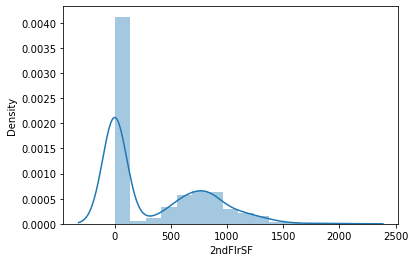

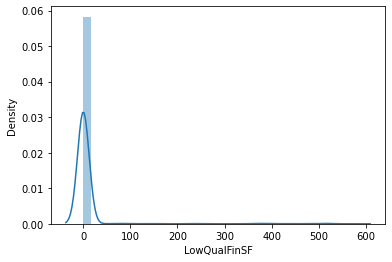

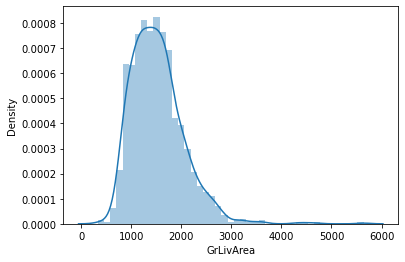

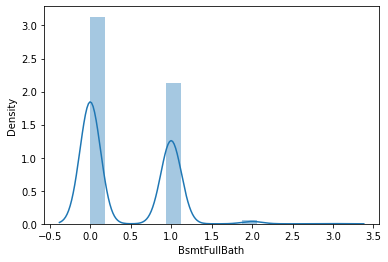

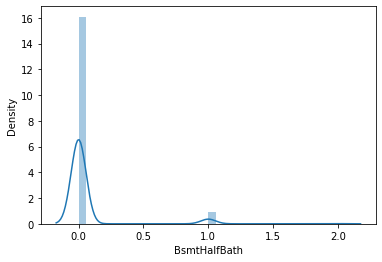

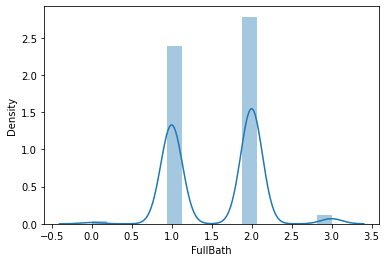

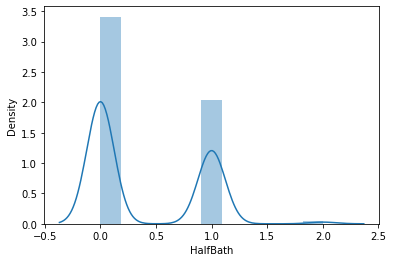

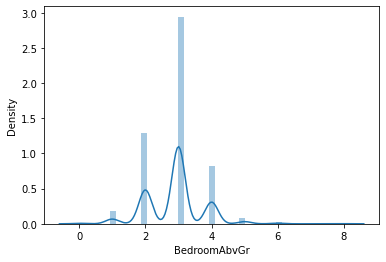

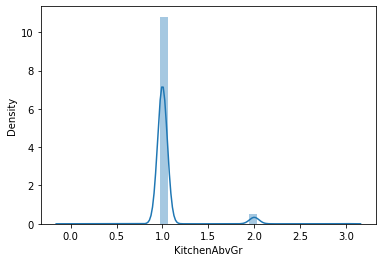

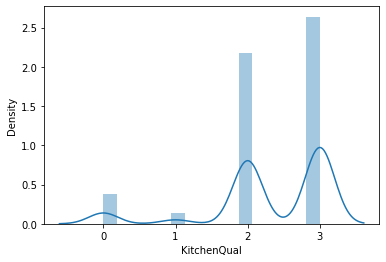

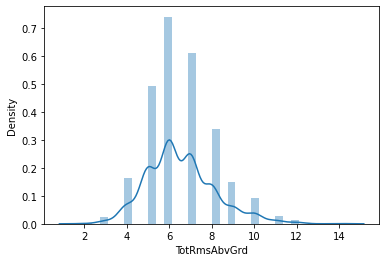

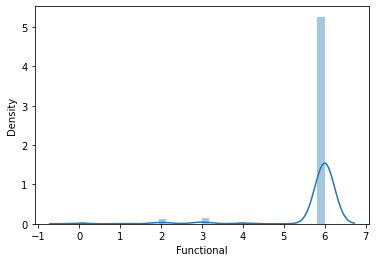

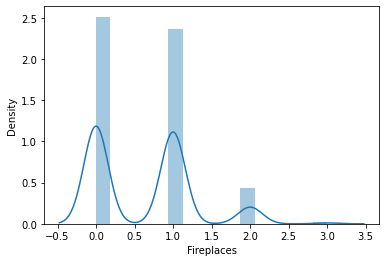

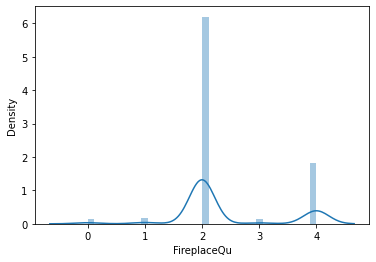

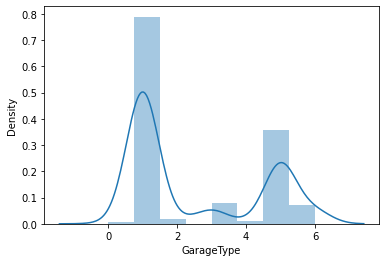

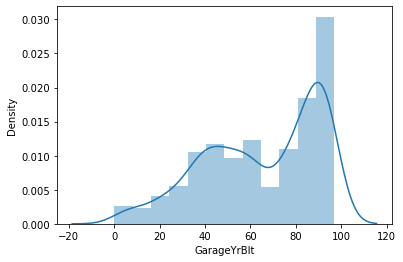

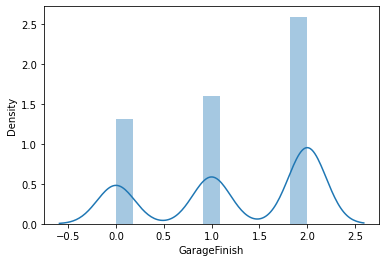

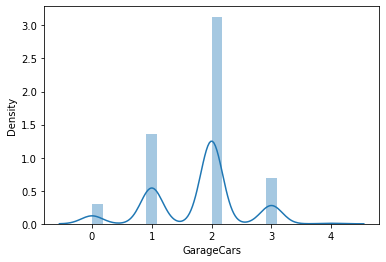

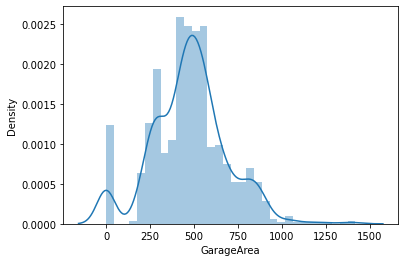

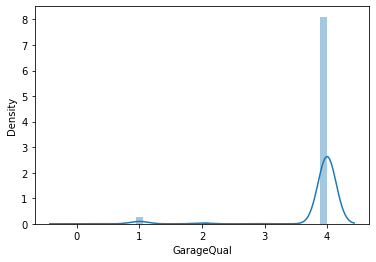

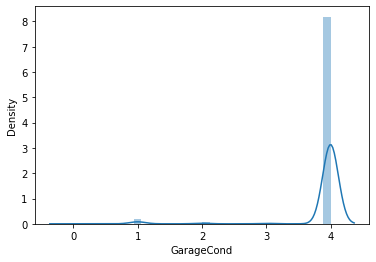

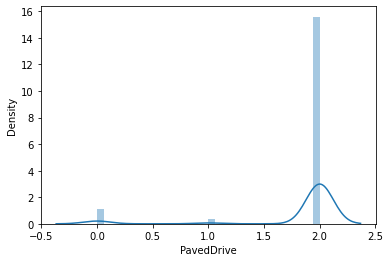

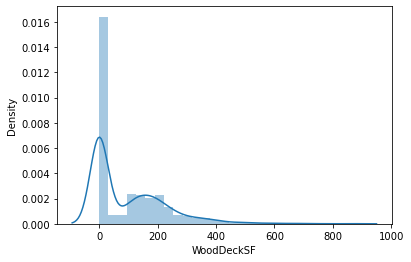

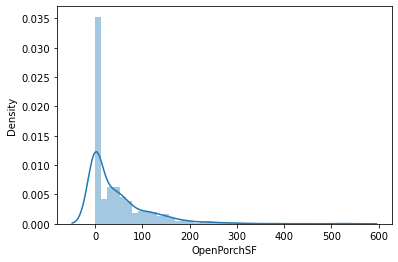

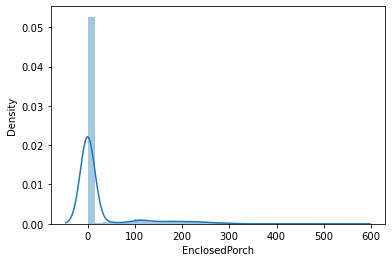

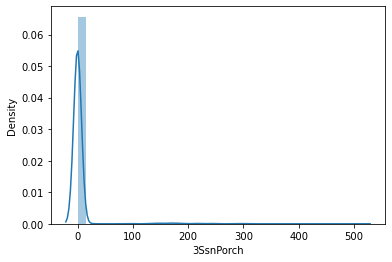

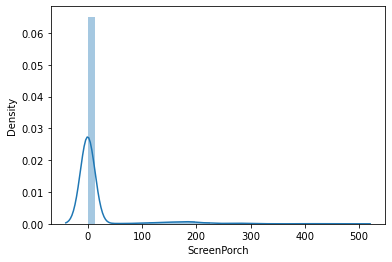

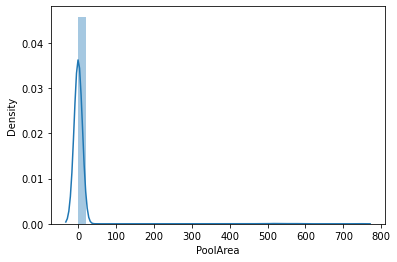

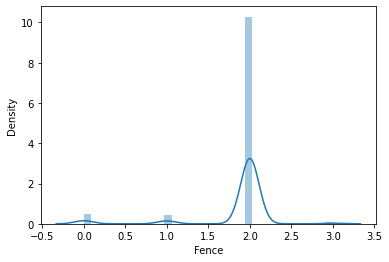

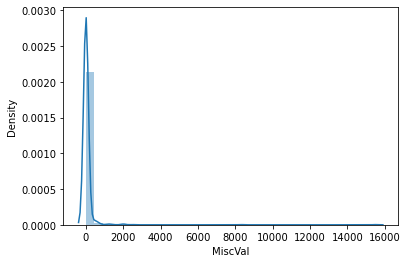

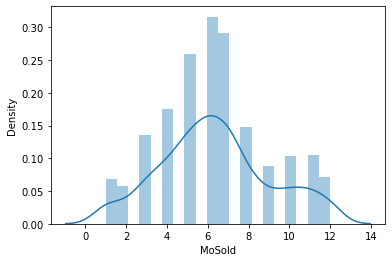

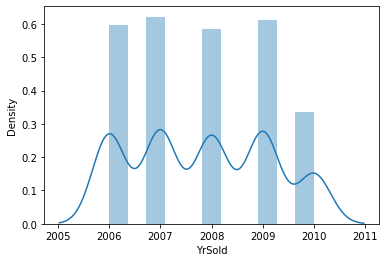

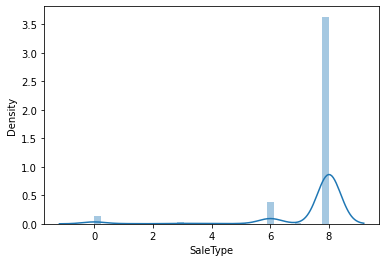

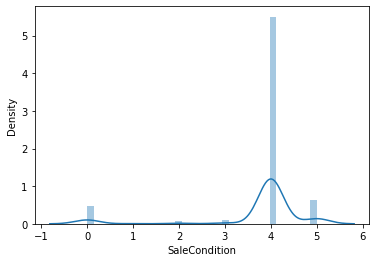

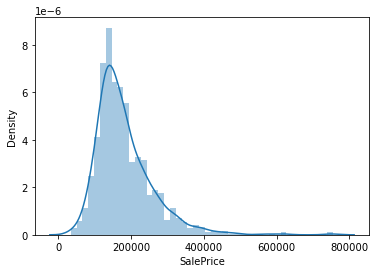

In [28]:
for i in train.columns:
    plt.figure()
    sns.distplot(train[i])

In [29]:
train.shape

(1168, 76)

# Exploratory data analysis (EDA) 

In [30]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [31]:
train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,3.013699,58.518836,10484.749144,0.996575,1.938356,2.773973,3.004281,0.064212,12.145548,...,3.639555,15.051370,3.448630,1.880993,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,41.940650,0.633120,32.576186,8957.442311,0.058445,1.412262,0.710027,1.642667,0.284088,6.010364,...,29.088867,55.080816,44.896939,0.457685,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,20.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,25.750000,7621.500000,1.000000,0.000000,3.000000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,50.000000,3.000000,70.000000,9522.500000,1.000000,3.000000,3.000000,4.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,70.000000,3.000000,84.000000,11515.500000,1.000000,3.000000,3.000000,4.000000,0.000000,17.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,190.000000,4.000000,106.000000,164660.000000,1.000000,3.000000,3.000000,4.000000,2.000000,24.000000,...,508.000000,480.000000,738.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


1. The mean is more than median.
2. There is a large difference in 75% percentile and max.
3.These observations suggest that there are outliers in these columns.
4.The mean value is higher that 50% it shows there is littel skwness present.

In [35]:
train.corr

<bound method DataFrame.corr of       MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3            9     4928       1         0   
1             20         3            4    15865       1         0   
2             60         3          105     9920       1         0   
3             20         3           52    11751       1         0   
4             20         3            9    16635       1         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3            9     9819       1         0   
1164          20         3           78     8777       1         3   
1165         160         3           37     2280       1         3   
1166          70         0           59     8500       1         3   
1167          60         3            9     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  3SsnPorch  \
0               3          4          0            13 

<AxesSubplot:>

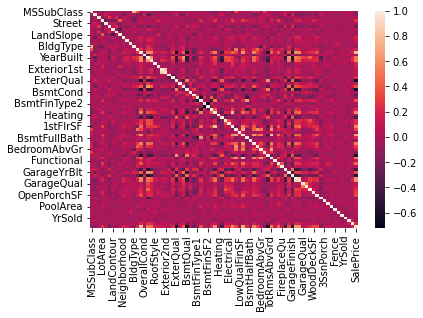

In [36]:
sns.heatmap(train.corr())

In [32]:
test.corr

<bound method DataFrame.corr of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... 

<AxesSubplot:>

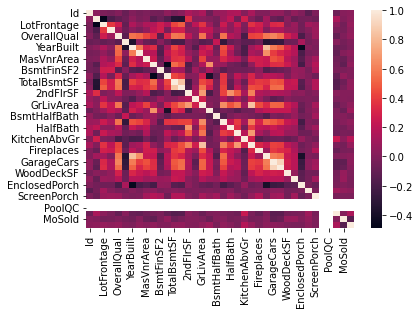

In [33]:
sns.heatmap(test.corr())

In [34]:
test.skew()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1088\1515727625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.429744
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.973451
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.663073
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
PoolQC                 NaN
MiscVal          13.264758
MoSold            0.186504
Y

# Visualizing data 

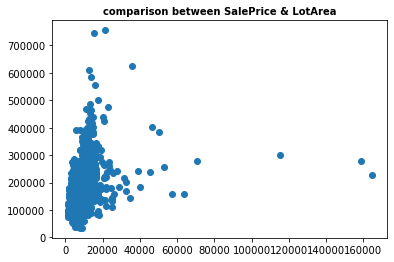

In [25]:
plt.scatter(train['LotArea'],train['SalePrice'])
plt.title('comparison between SalePrice & LotArea',fontsize=10,fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Identifies the general zoning classification of the sale.')

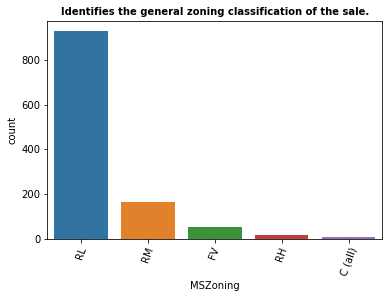

In [41]:
sns.countplot(x='MSZoning',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Identifies the general zoning classification of the sale.',fontsize=10,fontweight="bold")

Most of the general zoning classification of the sale is RL-Residential Low Density

Text(0.5, 1.0, 'Physical locations within Ames city limits')

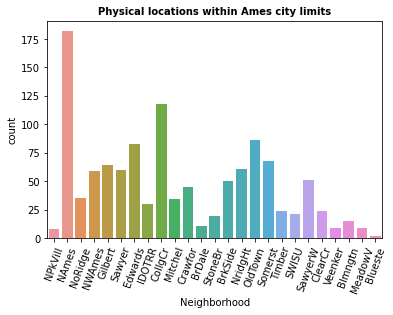

In [42]:
sns.countplot(x='Neighborhood',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Physical locations within Ames city limits',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Type of sale')

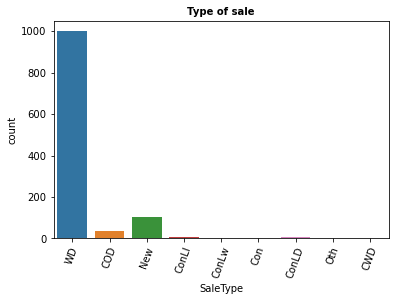

In [47]:
sns.countplot(x='SaleType',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Type of sale',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Condition of sale')

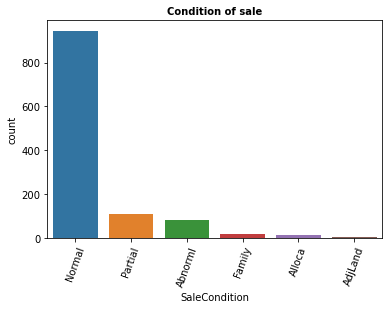

In [48]:
sns.countplot(x='SaleCondition',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Condition of sale',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Type of dwelling')

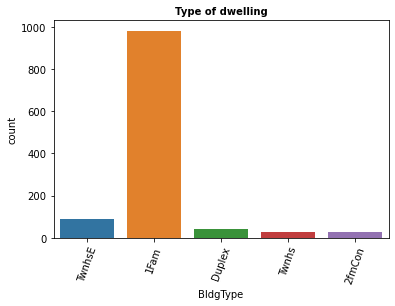

In [31]:
sns.countplot(x='BldgType',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Type of dwelling',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Style of dwelling')

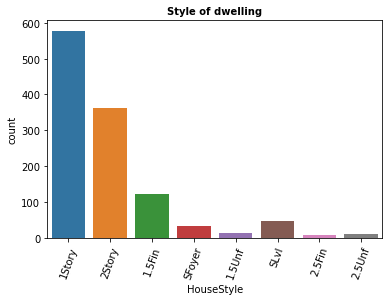

In [33]:
sns.countplot(x='HouseStyle',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Style of dwelling',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Type of road access to property')

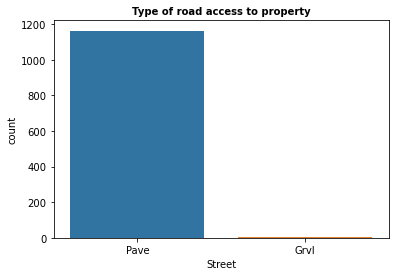

In [54]:
sns.countplot(x='Street',data=train)

plt.title('Type of road access to property',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Type of utilities available')

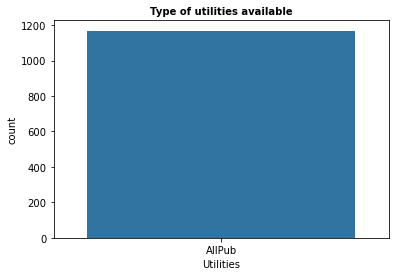

In [52]:
sns.countplot(x='Utilities',data=train)

plt.title('Type of utilities available',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Rates the overall material and finish of the house')

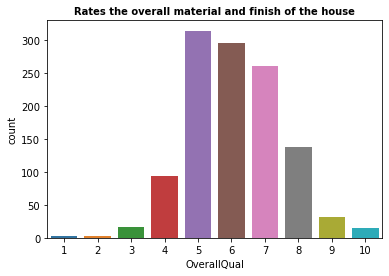

In [38]:
sns.countplot(x='OverallQual',data=train)

plt.title('Rates the overall material and finish of the house',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Rates the overall condition of the house')

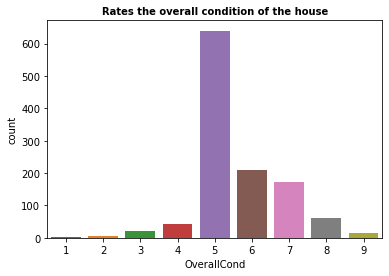

In [37]:
sns.countplot(x='OverallCond',data=train)

plt.title('Rates the overall condition of the house',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Type of roof')

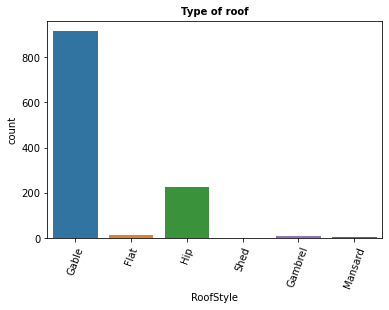

In [43]:
sns.countplot(x='RoofStyle',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Type of roof',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Evaluates the quality of the material on the exterior ')

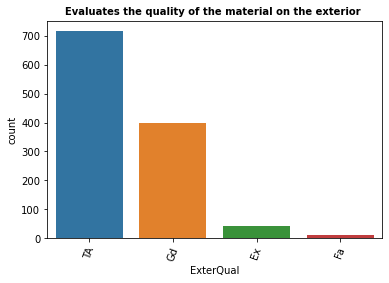

In [45]:
sns.countplot(x='ExterQual',data=train)
plt.xticks(rotation=70,fontsize=10)
plt.title('Evaluates the quality of the material on the exterior ',fontsize=10,fontweight="bold")

# Applying machine learning and finding the results

In [37]:
x=train.iloc[:,0:-1]
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120,3,9,4928,1,0,3,4,0,13,...,0,0,0,0,2,0,2,2007,8,4
1,20,3,4,15865,1,0,3,4,1,12,...,0,0,224,0,2,0,10,2007,8,4
2,60,3,105,9920,1,0,3,1,0,15,...,0,0,0,0,2,0,6,2007,8,4
3,20,3,52,11751,1,0,3,4,0,14,...,0,0,0,0,2,0,1,2010,0,4
4,20,3,9,16635,1,0,3,2,0,14,...,0,0,0,0,2,0,6,2009,8,4


In [38]:
y=train.iloc[:,-1]
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [39]:
x.shape

(1168, 75)

In [40]:
y.shape

(1168,)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [42]:
x_train.shape

(782, 75)

In [43]:
y_train.shape

(782,)

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
lm.coef_

array([-9.31424854e+01, -1.85762700e+03,  1.53596675e+01,  2.95634141e-01,
        1.98549743e+04, -1.52907996e+03,  4.91086144e+03,  1.07113372e+03,
        1.47240942e+03,  2.78166798e+02, -5.26266892e+02, -6.23298477e+02,
       -2.55185734e+03, -6.80390095e+02,  1.03541497e+04,  2.71946335e+03,
        1.34532596e+02, -4.00845964e+00,  2.24399702e+03,  7.47303912e+03,
       -1.31628318e+03,  4.82243793e+02,  2.18578550e+03,  2.27029080e+01,
       -1.08314069e+04, -5.08768768e+02,  2.24211734e+03, -1.14928446e+04,
        3.54681507e+03, -3.56242968e+03, -1.00917900e+03,  6.84476397e-01,
        7.92247373e+02, -5.54646859e+00,  1.26118646e-01, -4.73587361e+00,
       -3.27629349e+03, -1.23570848e+02,  4.23644592e+03, -1.47208877e+03,
        2.65146727e+01,  1.71953987e+01, -5.93665669e+00,  3.77734147e+01,
        1.16423234e+04,  5.62147560e+03,  5.37372797e+03, -1.26319632e+03,
       -1.02435752e+03, -1.54214866e+04, -7.27516055e+03,  1.07450818e+02,
        4.47365162e+03,  

In [47]:
lm.intercept_

1192160.5040064575

In [48]:
lm.score(x_train,y_train)

0.8463336253148805

In [49]:
#predict the value
pred=lm.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)

Predicted result price: [207790.58136303 131420.44692935  71959.67809553 194040.32782972
 106397.48385946 315512.77345274 174460.91898225 158556.6214833
 129666.20542848 228815.81546768 122085.86049239 230657.36448378
 220570.85407917 231121.74202972 150865.55024151 276942.53320853
 108305.76015036 291009.88646756 139184.92896223 166508.23948948
 167300.02181303 304118.22736714 212307.06074988 145815.90976868
 186564.50260235 114631.80519607 137483.38433475 174683.66375904
 266906.27743793 191959.78734295 174778.276618   186453.18717781
 105844.41994159 125998.17979314 136870.86205739 233512.80993759
 170000.48632048 125227.31863919 107152.39514065 217801.19357958
  58157.8418586  143642.69356582 205099.31136669 328056.85056443
  80969.92820167  83237.86852346 145803.02753126 123080.55486875
 236046.84122673 244680.48287557 132732.14131404  79265.17125838
 156281.6633122  151059.59673558  97390.4917599  387876.52969875
 146493.03044105 118446.97119935 157474.91589284 241406.38477501
 2

In [50]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mea squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 21827.031908438566
Mea squared error: 1458475974.0236824
Root Mean Squared Error: 38189.99835066352


In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7750428447135069


# Sharing findings

In [ ]:
-I find out the price of houses with the available independent variables
-I find out which variables are important to predict the price of variable by ploting countplot
-these variables describe the price of the house